In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv("heart.csv")
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

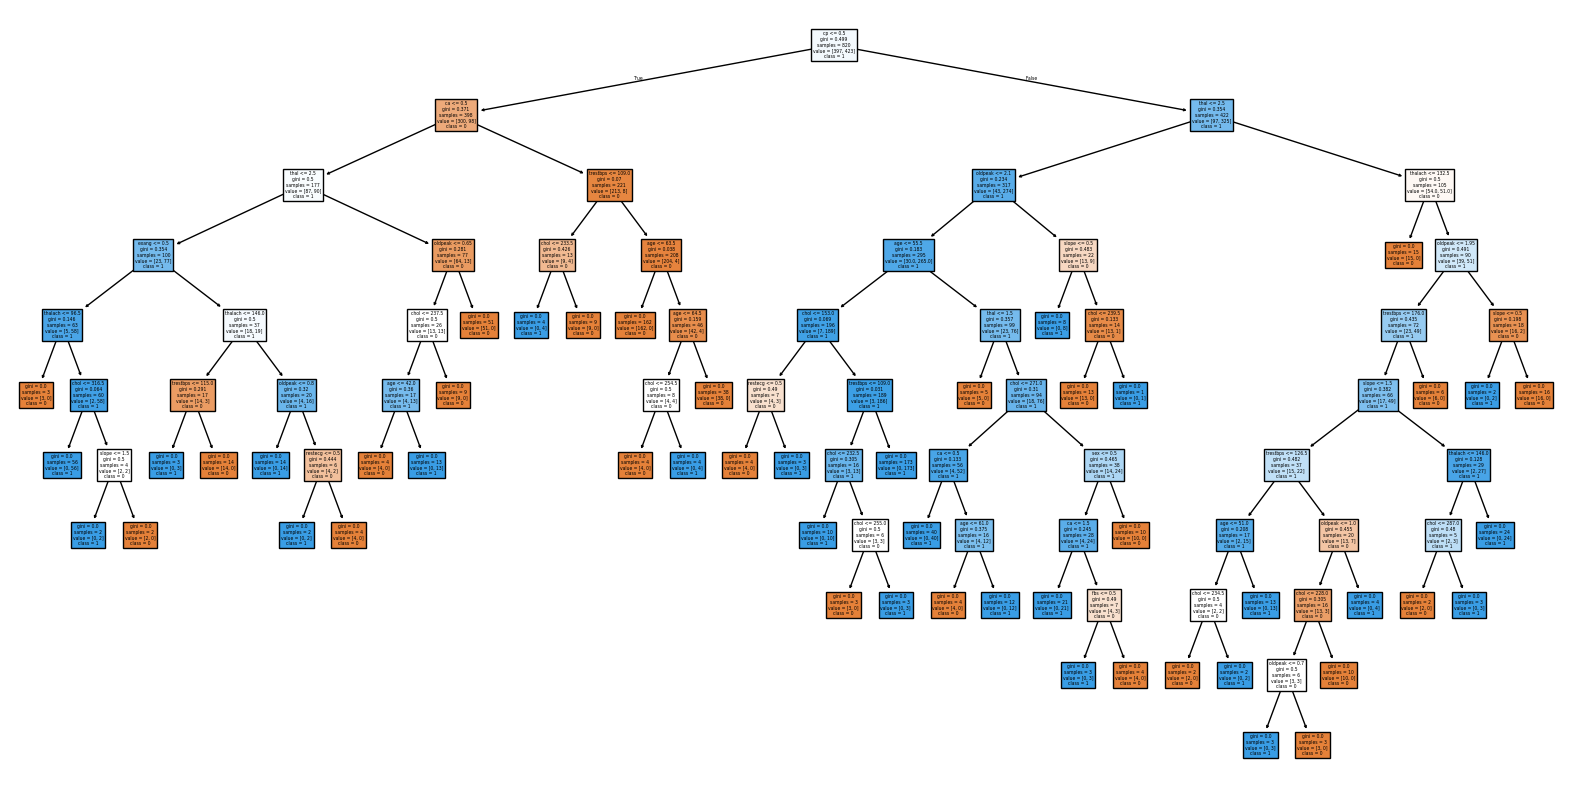

Decision Tree Accuracy: 0.9853658536585366


In [4]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=['0','1'], filled=True)
plt.show()
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

In [5]:
dt_limited = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_limited.fit(X_train, y_train)
y_pred_limited = dt_limited.predict(X_test)
print("Depth-Limited Decision Tree Accuracy:", accuracy_score(y_test, y_pred_limited))

Depth-Limited Decision Tree Accuracy: 0.8


In [6]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.9853658536585366


In [7]:
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importances:\n", importances)


Feature Importances:
 cp          0.135072
ca          0.127327
thalach     0.122169
oldpeak     0.121905
thal        0.110518
age         0.077908
chol        0.074822
trestbps    0.071171
exang       0.057594
slope       0.045782
sex         0.028731
restecg     0.018557
fbs         0.008444
dtype: float64


In [8]:
cv_scores_dt = cross_val_score(dt, X, y, cv=5)
cv_scores_rf = cross_val_score(rf, X, y, cv=5)
print("\nCross-Validation Mean Accuracy (Decision Tree):", cv_scores_dt.mean())
print("Cross-Validation Mean Accuracy (Random Forest):", cv_scores_rf.mean())


Cross-Validation Mean Accuracy (Decision Tree): 1.0
Cross-Validation Mean Accuracy (Random Forest): 0.9970731707317073
